# INFSCI 0510 (Data Analytics)
## Final Project 
### By Devon Smith

### Part 1: Abstract

<mark> Predicting Educational Outcomes </mark>
- Devon Smith
- djs225@pitt.edu
- Dataset Used: Student Performance Factors by *Practice Data Analysis With Me* (Kaggle)

**Question: Can we predict future educational outcomes using student data to act early in
providing students with resources?**

*Why this question is interesting to me:* 

Educational institutions acquire lots of student data based on their academic record, and
through student portals in which students access educational resources. This question is
interesting to me because it can provide support to students before future failure may occur,
giving them an early warning to start changing their approach to learning to ensure they perform
well.

*Why do I consider it useful:*

It can help students gain help before they might know they even need it, providing the
correct population of students with resources they may need. This can help them prevent failing
a class, which can save them money and time.

*Who would use your model / benefit from your model*

This model would mainly benefit students and educators. Educators/Institutions could
see the number of students in their classes who are performing poorly, and change their
teaching approaches to best accommodate them. Students could use the early warning system
to change their effort level they give to a specific class.

*Overall Plan For Data Analysis*

The plan is to focus on attributes that can lead directly to student success, including time
spent looking at a course’s canvas page, previous course grades, and more to see which
factors have more influence. The goal is to build a supervised learning model that compares the
model’s predictions to student’s grades in a class, to ensure it is accurate. I will address outliers
/distributions to ensure that it follows a normal distribution before applying a different machine
learning model, as well as cleaning up any missing data by replacing missing values with the
mean value of that column.

### Part 2: Exploratory Data Analysis 

In [209]:
#Importing Packages
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

#### EDA Objectives
- Find which factors have the strongest coorelation with student grades
- Find any patterns in time spent in a course?
    - Do any factors (such as Extracurriculars and Motivation) have an impact on Attendance and Hours Studied?
- Do prior grades predict future outcomes?

#### Step 0: Importing Data / Data Summary

In [210]:
#Loading Dataset
df = pd.read_csv("C:\\Users\\devon\\OneDrive\\Desktop\\pitt_programming\\INFSCI0510\\datasets\\StudentPerformanceFactors.csv")

In [211]:
df.head()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70


In [212]:
#Getting a sense of the data
df.shape


(6607, 20)

In [213]:
#Getting Sense of the Data
df.dtypes

Hours_Studied                  int64
Attendance                     int64
Parental_Involvement          object
Access_to_Resources           object
Extracurricular_Activities    object
Sleep_Hours                    int64
Previous_Scores                int64
Motivation_Level              object
Internet_Access               object
Tutoring_Sessions              int64
Family_Income                 object
Teacher_Quality               object
School_Type                   object
Peer_Influence                object
Physical_Activity              int64
Learning_Disabilities         object
Parental_Education_Level      object
Distance_from_Home            object
Gender                        object
Exam_Score                     int64
dtype: object

In [214]:
#Looking at Non-Null Counts
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Hours_Studied               6607 non-null   int64 
 1   Attendance                  6607 non-null   int64 
 2   Parental_Involvement        6607 non-null   object
 3   Access_to_Resources         6607 non-null   object
 4   Extracurricular_Activities  6607 non-null   object
 5   Sleep_Hours                 6607 non-null   int64 
 6   Previous_Scores             6607 non-null   int64 
 7   Motivation_Level            6607 non-null   object
 8   Internet_Access             6607 non-null   object
 9   Tutoring_Sessions           6607 non-null   int64 
 10  Family_Income               6607 non-null   object
 11  Teacher_Quality             6529 non-null   object
 12  School_Type                 6607 non-null   object
 13  Peer_Influence              6607 non-null   obje

In [215]:
#Looking at Summary Stats
df.describe()

,Hours_Studied,Attendance,Sleep_Hours,Previous_Scores,Tutoring_Sessions,Physical_Activity,Exam_Score
count,6607.000000,6607.000000,6607.00000,6607.000000,6607.000000,6607.000000,6607.000000
mean,19.975329,79.977448,7.02906,75.070531,1.493719,2.967610,67.235659
std,5.990594,11.547475,1.46812,14.399784,1.230570,1.031231,3.890456
min,1.000000,60.000000,4.00000,50.000000,0.000000,0.000000,55.000000
25%,16.000000,70.000000,6.00000,63.000000,1.000000,2.000000,65.000000
50%,20.000000,80.000000,7.00000,75.000000,1.000000,3.000000,67.000000
75%,24.000000,90.000000,8.00000,88.000000,2.000000,4.000000,69.000000
max,44.000000,100.000000,10.00000,100.000000,8.000000,6.000000,101.000000


In [216]:
#making column names lowercase
df.columns = df.columns.str.lower()

 #### Step 1: Data Cleaning
 
 #### i. Dealing With Missing Values


In [217]:
df.isnull().sum()

hours_studied                  0
attendance                     0
parental_involvement           0
access_to_resources            0
extracurricular_activities     0
sleep_hours                    0
previous_scores                0
motivation_level               0
internet_access                0
tutoring_sessions              0
family_income                  0
teacher_quality               78
school_type                    0
peer_influence                 0
physical_activity              0
learning_disabilities          0
parental_education_level      90
distance_from_home            67
gender                         0
exam_score                     0
dtype: int64

<AxesSubplot: >

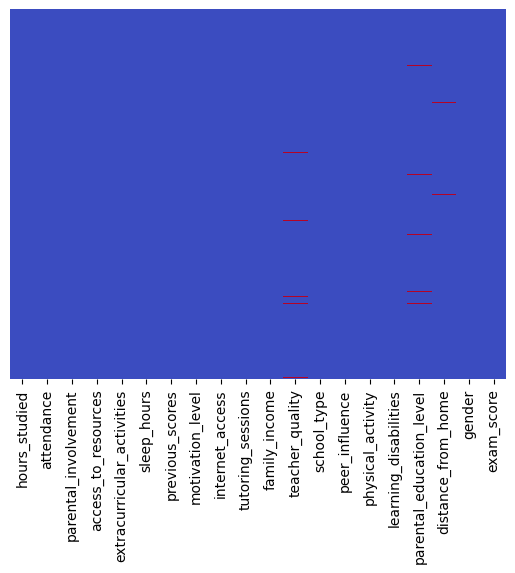

In [218]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='coolwarm')

In [219]:
#Querying All Rows that Contain Null Values to See How Many Overlap
df.loc[df.isnull().any(axis=1)]

,hours_studied,attendance,parental_involvement,access_to_resources,extracurricular_activities,sleep_hours,previous_scores,motivation_level,internet_access,tutoring_sessions,family_income,teacher_quality,school_type,peer_influence,physical_activity,learning_disabilities,parental_education_level,distance_from_home,gender,exam_score
33,14,60,High,Medium,No,5,50,Medium,Yes,2,Medium,Medium,Public,Neutral,3,No,College,NaN,Female,61
127,17,97,Medium,Medium,No,8,89,Medium,Yes,1,Low,NaN,Public,Neutral,4,No,High School,Far,Male,69
240,15,87,Low,Medium,No,4,54,Medium,Yes,1,Medium,Medium,Public,Neutral,6,No,NaN,Moderate,Male,65
275,23,82,Low,Medium,Yes,8,94,Medium,Yes,1,Medium,Medium,Public,Negative,2,Yes,High School,NaN,Male,66
316,24,90,Low,Low,No,7,83,Medium,Yes,0,Low,Medium,Private,Positive,3,No,College,NaN,Male,68
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6502,23,64,Medium,Medium,No,7,75,Medium,Yes,2,Medium,High,Public,Positive,2,No,NaN,Near,Female,66
6579,9,84,Medium,Medium,No,6,74,Medium,Yes,5,High,NaN,Public,Neutral,2,No,High School,Near,Male,67
6589,22,90,Low,High,No,5,99,Medium,Yes,1,Low,Low,Private,Positive,2,No,College,NaN,Female,70
6594,9,90,High,High,Yes,7,79,Low,Yes,4,High,High,Public,Positive,4,No,High School,NaN,Male,70


In [220]:
#Rows that contain nulls divided by total data
229/6607

0.03466020886938096

In [221]:
#Since only 3% of the rows contain missing data, I will delete them.
df = df.dropna()

#### Dealing With Missing Values: Summary

- When visualizing the missing values in a heatmap, I found they primarily were missing in three categories: Teacher Quality, Parent Education Level, and Distance from Home.
- These variables may have been missing in large quanities because students may not have felt comfortable sharing this information. They may have not wanted to disrespect a teacher accidentally, and share any information about their homes location. In addition, students may not have shared their parents education level as they may not be sure of it.
- I found that <mark> the rows that contain these nulls are only 3% of the total data </mark>, allowing me to make the choice to <mark> simply delete them </mark> because i) I could not find any relevant bias in deleting them ii) they are a small share of the data, with much more left to use iii) These attributes will not even be used in my final models.

#### Step 1: Data Cleaning

#### ii. Dealing with Outliers

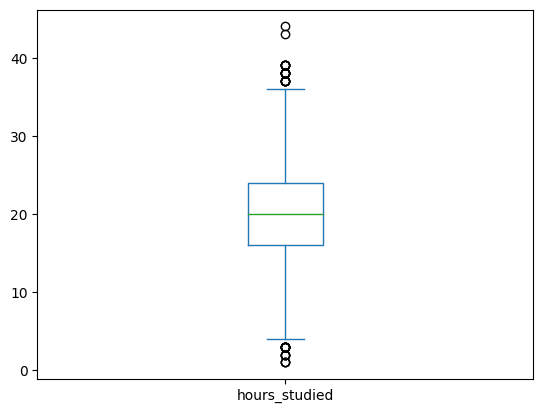

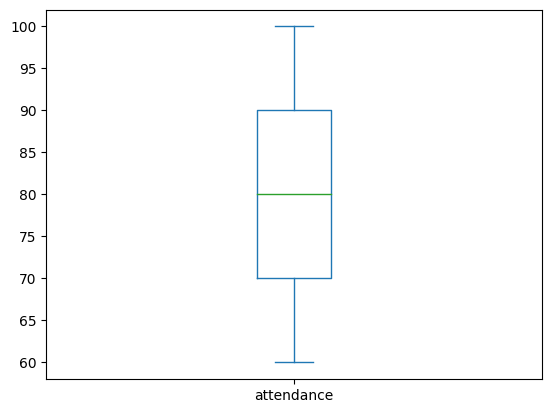

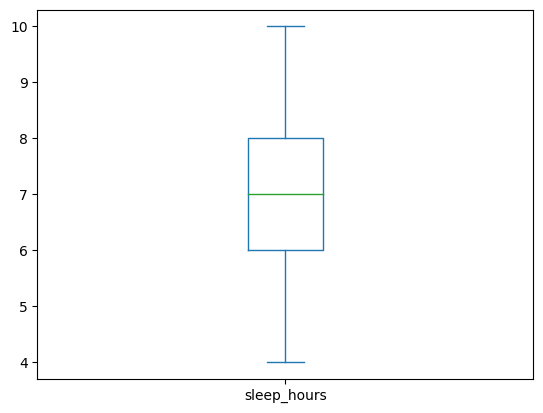

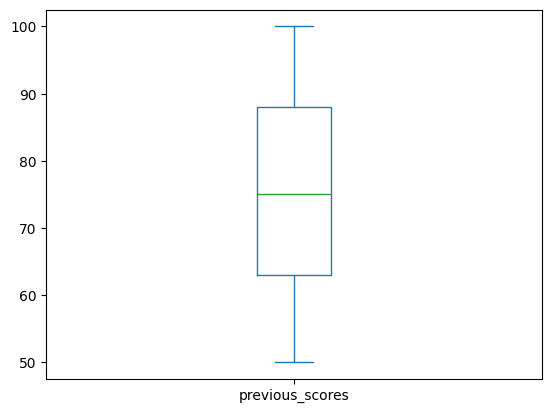

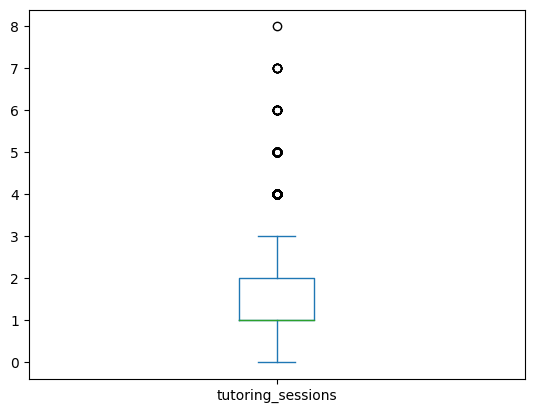

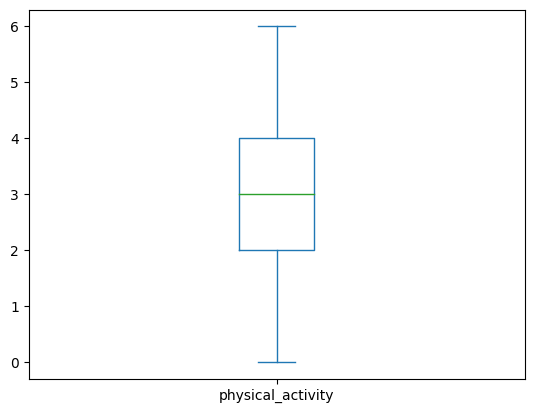

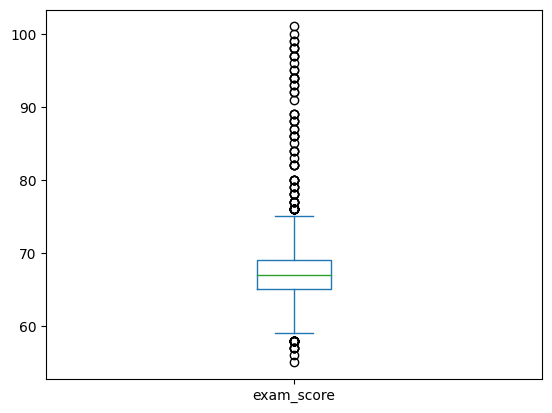

In [222]:
#Making Box Plot for Each Variable with Numeric Values
for col in df.columns:
    if df[col].dtype == 'int64' or df[col].dtype == 'float64':
#I was encountering an error with axes, so I manually create them for each
        fig, ax = plt.subplots()
        df[col].dropna().plot.box(ax=ax)
        ax.set_xticks([1])
#Displaying All Numeric Plots
        plt.show()

#### Dealing with Outliers: Summary

Variables with Outliers: Hours Studied, Tutoring Sessions, Exam Score

These outliers are valid data and therefore cannot be deleted. There is nothing that suggests that these are human error upon data entry, but valid circumstances that happen under each variables. I will transform, then scale the data so the outliers don't have a major effect on the models.


 Step 1: Data Cleaning
 
 iii. Evaluating Distribution

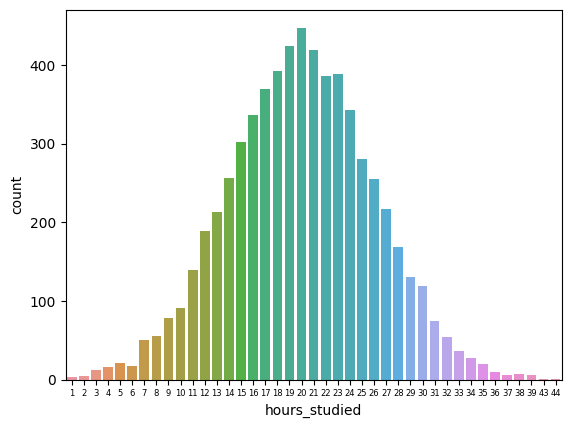

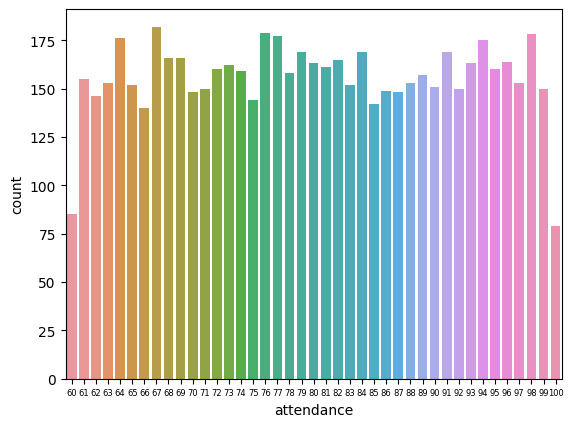

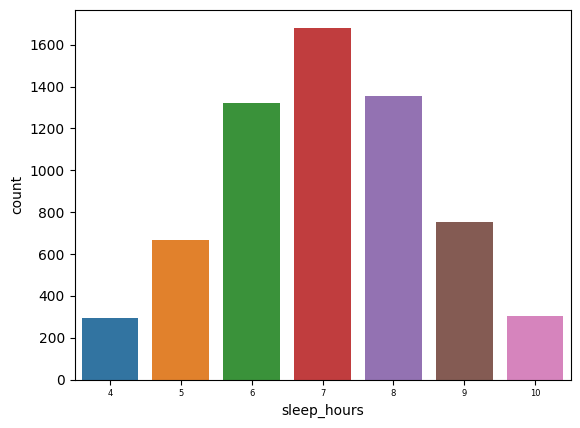

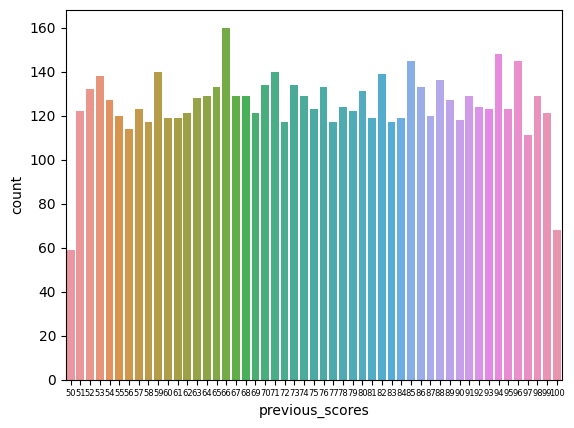

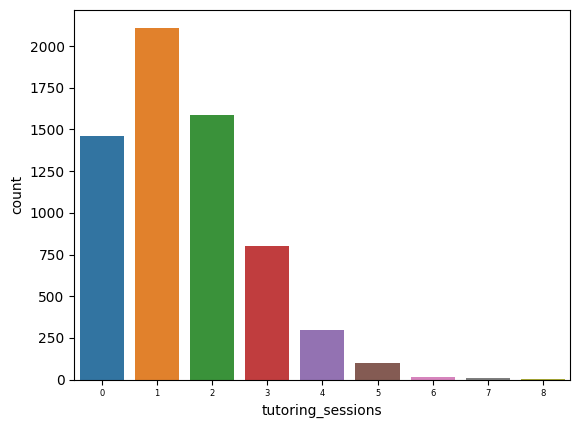

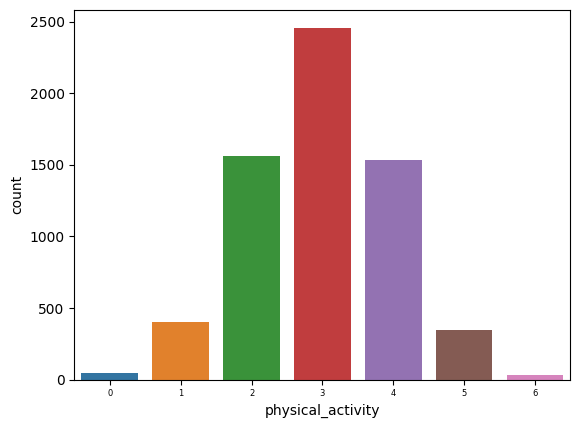

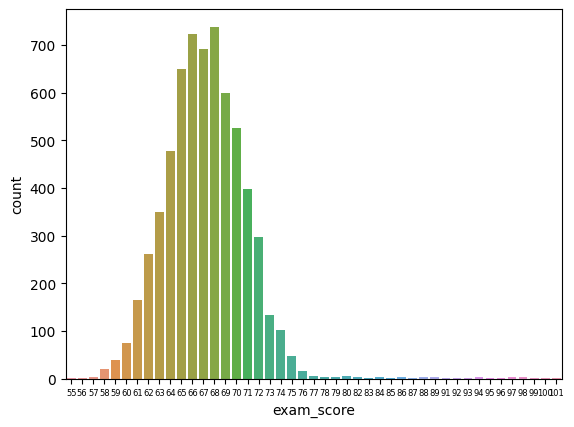

In [223]:
#Printing out distributions for each numeric values
for col in df.columns:
    if df[col].dtype == 'int64' or df[col].dtype == 'float64':
        sns.countplot(x=df[col], data=df) #Making bar plot based on Company's given scores
        plt.xticks(fontsize=6) #Font Size was too big, causing text to overlap
        plt.show()


Distributions:
- Hours Studied: Normal Distribution
- Attendance: Uniform Distribution
- Sleep Hours: Normal Distribution
- Previous Scores: Normal Distribution
- Tutoring Sessions: Right Skewed Distribution
- Physical Activity: Normal Distribution
- Exam Score: Right Skewed Distribution

In [224]:
#Transforming Distributions with Right Skew (Tutoring Sessions)
#Note: I am not transforming exam score because it is the value I am trying to predict.
df['log_tutoring_sessions'] = np.log(df['tutoring_sessions'] + 1)


In [225]:
df.head()

,hours_studied,attendance,parental_involvement,access_to_resources,extracurricular_activities,sleep_hours,previous_scores,motivation_level,internet_access,tutoring_sessions,...,teacher_quality,school_type,peer_influence,physical_activity,learning_disabilities,parental_education_level,distance_from_home,gender,exam_score,log_tutoring_sessions
0,23,84,Low,High,No,7,73,Low,Yes,0,...,Medium,Public,Positive,3,No,High School,Near,Male,67,0.000000
1,19,64,Low,Medium,No,8,59,Low,Yes,2,...,Medium,Public,Negative,4,No,College,Moderate,Female,61,1.098612
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,...,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74,1.098612
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,...,Medium,Public,Negative,4,No,High School,Moderate,Male,71,0.693147
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,...,High,Public,Neutral,4,No,College,Near,Female,70,1.386294


#### Evaluating Distributions: Summary

- After visualizing each of the numeric visualizations, I found that there were only two variables with skewed distributions, being tutoring sessions and exam score.
- I chose to do a log transformation because log transformations are best for right skewed distributions, and will help achieve a more normal distribution for the models.

 #### Step 1: Data Cleaning
 
 #### iv. Evaluating Scale of Numeric Variables

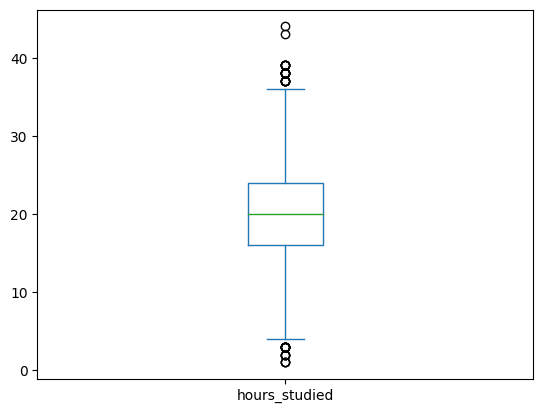

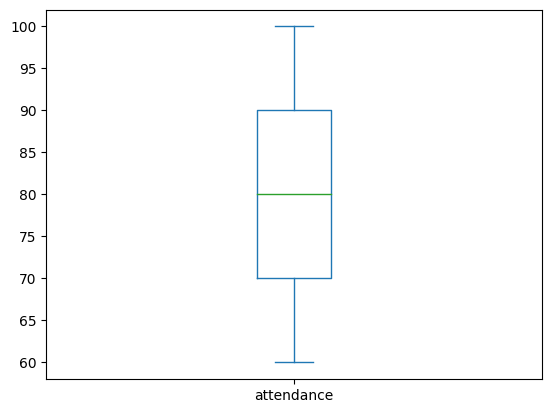

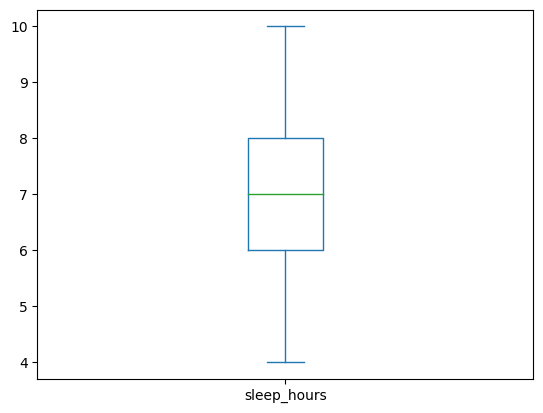

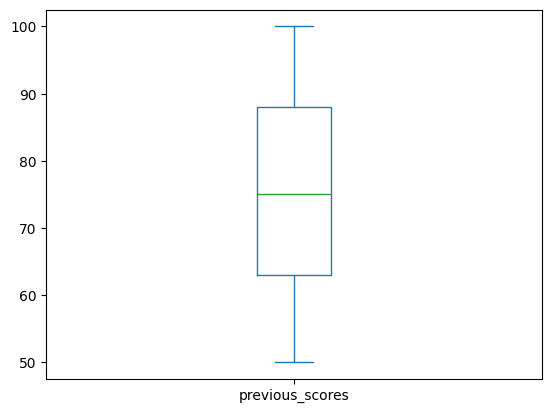

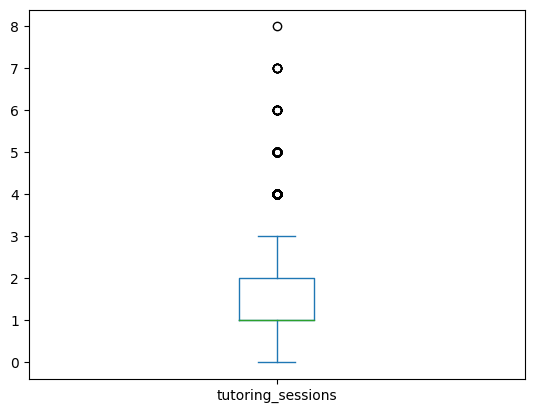

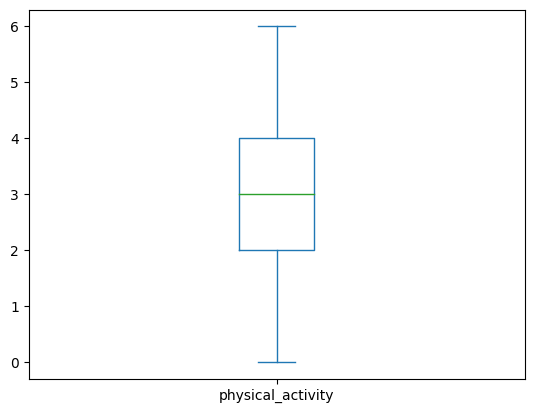

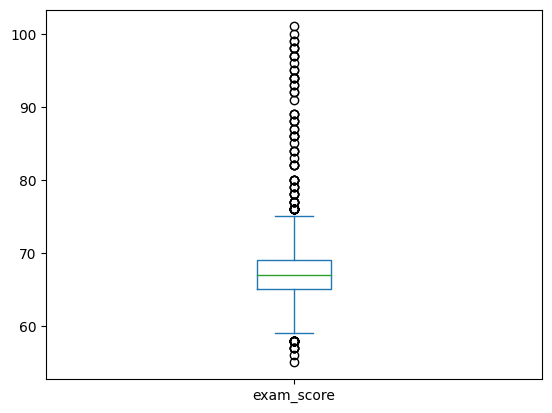

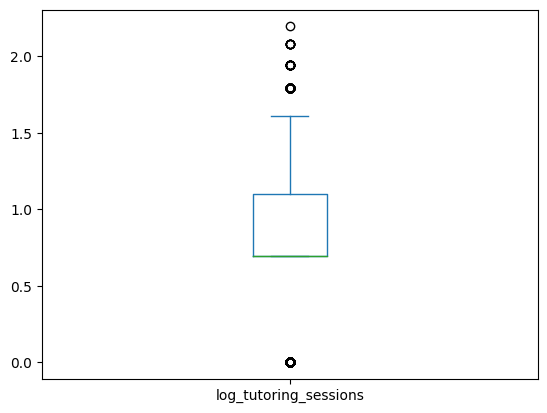

In [226]:
#Re-Doing the Box Plots to Assess the Scale
#Feedback Same as First Time, Redoing to View Again
for col in df.columns:
    if df[col].dtype == 'int64' or df[col].dtype == 'float64':
        #I was encountering an error with axes, so I manually create them for each
        fig, ax = plt.subplots()
        df[col].dropna().plot.box(ax=ax)
        ax.set_xticks([1])
#Displaying All Numeric Plots
        plt.show()


In [227]:
for col in df.columns:
    if df[col].dtype == 'int64' or df[col].dtype == 'float64':
        print(col)
        print(df[col].min())
        print(df[col].max())
        print('______________________')

hours_studied
1
44
______________________
attendance
60
100
______________________
sleep_hours
4
10
______________________
previous_scores
50
100
______________________
tutoring_sessions
0
8
______________________
physical_activity
0
6
______________________
exam_score
55
101
______________________
log_tutoring_sessions
0.0
2.1972245773362196
______________________


Some variables go from 50-100, while some go to 0-6. I will scale down the data so that everything has similar weighted scales.


In [228]:
from sklearn.preprocessing import LabelEncoder

# Iterate through each categorical column in the DataFrame
for column in df.select_dtypes(include=['object']).columns:
    df[column] = LabelEncoder().fit_transform(df[column])

In [229]:
#Scaling the Data
from sklearn import preprocessing as prep

model_df = pd.DataFrame()

# Loop through each column to scale and add to the new DataFrame
for col in df.columns:
    if (df[col].dtype == 'int64' or df[col].dtype == 'float64') and col != 'exam_score':
        model_df[col + '_scaled'] = prep.scale(df[col])
    else:
        model_df[col] = df[col]

In [230]:
model_df = model_df.dropna()


#### Evaluating Scale of Numeric Variables: Summary

-When looking at the min/max values and the distributions, each of the variables had different scales. I created a new dataframe that scaled the data down so they have similar scales.

#### Step 2: Feature Selection
 
 #### i. list of features that you are planning on using in your analysis

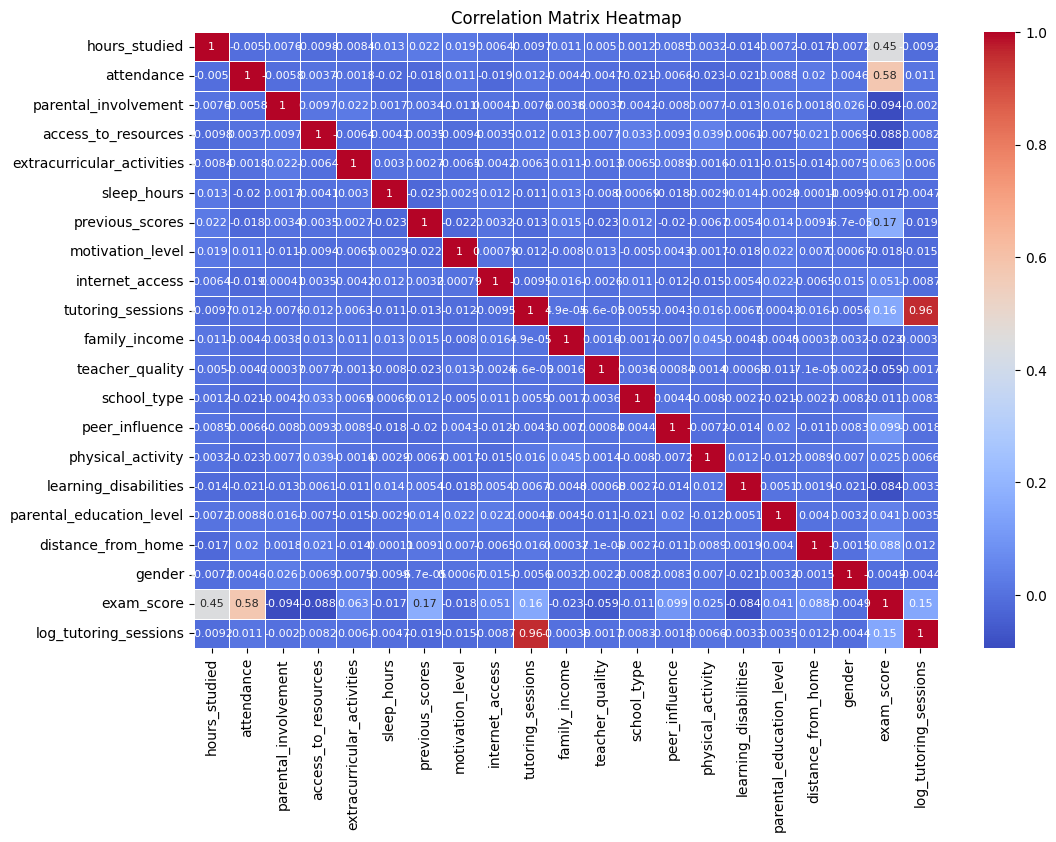

In [231]:
#Making Coorelation Matrix Heatmap to ensure I don't use independent variables that highhly coorelate with each other

corr_matrix = df.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5, annot_kws={'size': 8})
plt.title("Correlation Matrix Heatmap")
plt.show()

Based on the coorelation matrix, there are no independent variables that have a high coorelation with each other. However, I have picked the following variables to use for the models due to their higher coorelation with exam scores.

- Hours Studied
- Attendance
- Previous Scores
- Tutoring Sessions


 Step 2: Feature Selection
 
 ii. justification explaining why you are using these particular features

I am using these features as they are quantifiable metrics that can be used to determine a student's performance academically.
- Other variables, such as Parental Involvement and Motivation Level, seemed to be more subjective features that are open wider to interpretation, which can result in more bias
- Other variables such as Sleep and Motivation Level are important factors, but those factors are often factors in the specific variables I've already chosen. (Ex: Motivation Level Affects Hours Studied)

Step 2: Feature Selection

iii. Descriptive statistics for each feature

In [232]:
for col in df.columns:
    print("Column:", col)
    print('Mean: ' + str(df[col].mean()))
    print('Median: ' + str(df[col].median()))
    print('Mode: ' + str(df[col].mode()[0]))
    print('Standard Deviation: ' + str(np.std(df[col])))
    print('Variance: ' + str(np.var(df[col])))
    print('Range: ' + str(np.max(df[col]) - np.min(df[col])))
    print('__________________________')


Column: hours_studied
Mean: 19.97710881153967
Median: 20.0
Mode: 20
Standard Deviation: 5.984990344261015
Variance: 35.82010942089759
Range: 43
__________________________
Column: attendance
Mean: 80.02085293195358
Median: 80.0
Mode: 67
Standard Deviation: 11.549817292309868
Variance: 133.39827948574006
Range: 40
__________________________
Column: parental_involvement
Mean: 1.2218563813107557
Median: 2.0
Mode: 2
Standard Deviation: 0.8650810343869629
Variance: 0.7483651960560177
Range: 2
__________________________
Column: access_to_resources
Mean: 1.204452806522421
Median: 2.0
Mode: 2
Standard Deviation: 0.8708902986280171
Variance: 0.758449912244397
Range: 2
__________________________
Column: extracurricular_activities
Mean: 0.59689557855127
Median: 1.0
Mode: 1
Standard Deviation: 0.4905214030572109
Variance: 0.24061124685721477
Range: 1
__________________________
Column: sleep_hours
Mean: 7.034963938538727
Median: 7.0
Mode: 7
Standard Deviation: 1.4679177566364696
Variance: 2.15478254

Step 2: Feature Selection

iv. Which features are predictors and which features is the response

In [233]:
model_df.head()

,hours_studied_scaled,attendance_scaled,parental_involvement,access_to_resources,extracurricular_activities,sleep_hours_scaled,previous_scores_scaled,motivation_level,internet_access,tutoring_sessions_scaled,...,teacher_quality,school_type,peer_influence,physical_activity_scaled,learning_disabilities,parental_education_level,distance_from_home,gender,exam_score,log_tutoring_sessions_scaled
0,0.505079,0.344520,1.0,0.0,0.0,-0.023819,-0.143491,1.0,1.0,-1.211858,...,2.0,1.0,2.0,0.026516,0.0,1.0,2.0,1.0,67.0,-1.524348
1,-0.163260,-1.387109,1.0,2.0,0.0,0.657418,-1.115763,1.0,1.0,0.409036,...,2.0,1.0,0.0,0.998480,0.0,0.0,1.0,0.0,61.0,0.601734
2,0.672163,1.556661,2.0,2.0,1.0,-0.023819,1.106573,2.0,1.0,0.409036,...,2.0,1.0,1.0,0.998480,0.0,2.0,2.0,1.0,74.0,0.601734
3,1.507587,0.777428,1.0,2.0,1.0,0.657418,1.592709,2.0,1.0,-0.401411,...,2.0,1.0,0.0,0.998480,0.0,1.0,1.0,1.0,71.0,-0.182940
4,-0.163260,1.037172,2.0,2.0,1.0,-0.705056,-0.699075,2.0,1.0,1.219483,...,0.0,1.0,1.0,0.998480,0.0,0.0,2.0,0.0,70.0,1.158469


<mark> Predictor Variables: hours_studied_scaled, attendance_scaled, previous_scores_scaled, tutoring_sessions_scaled
-Response Variable: exam_score </mark>

Step 2: Feature Selection

iv. Any issues with the selected features (e.g. outliers, skewed distributions, missing values) and descriptions (including visualizations) on how you addressed these issues

- Tutoring Sessions had a right skewed distribution, so I performed a log transformation to reduce it's impact.
- Tutoring Sessions had 5 outliers, which were found to be valid data points. I scaled the data to reduce the outliers impact on the data.
- Hours Studied had 5 outliers, which were found to be valid data points. I scaled the data to reduce the outliers impact on the data.


- Historgrams helped me recgonize the right skew distribution, and the box plots helped me recgonize the outliers to be fixed.

#### Part 3: Building / Evaluating Models

Objectives:
- Create Three Machine Learn Models
    - Train, Evaluate, Compare The Three
    - Explain Why I Chose These Models In Particular
    - Identify the Best Model
    
- Write Conclusion
    - Lessons Learned
    - Explained why best performing model is the best one out of the 3
    - Identify Limitations / What Could Have Been Done Better?

Models I'm Using

1. *Logistic Regression*
    -I will use Logistic Regression First because it's the easiest to implement and often most effective. 
2. *Random Forest*
    -I will use Random Forest as it's one of the most effective non-neural network models.
3. *KNN (K-Nearest Neighbor)*
    -I will use KNN because it's efficent for multiple class cases, which this dataset has some of.
I did not want to use models such as Naive Bayes as they have trouble with columns with multiple categories, which this dataset has.

1. Setting Up Models

In [254]:
#For the Models, Encoding Exam Scores so that it's either 1 for Passing or 0 for Not Passing
#Above / Equal to 70 is Passing, Below 65 is Not Passing

model_df['passing'] = model_df['exam_score'].apply(lambda x: 1 if x >= 70 else (0 if x < 70 else None))

In [255]:
#First, I need to create a dataset with the selected features from my EDA

df2 = model_df
df2 = df2.drop(columns=['parental_involvement', 'access_to_resources', 'extracurricular_activities', 'sleep_hours_scaled', 'motivation_level', 'internet_access', 'teacher_quality', 'school_type', 'peer_influence', 'physical_activity_scaled', 'learning_disabilities', 'parental_education_level', 'distance_from_home', 'gender', 'tutoring_sessions_scaled', 'family_income', 'exam_score' ])

In [256]:
#Checking to ensure only necessary columns left
df2.head()

,hours_studied_scaled,attendance_scaled,previous_scores_scaled,log_tutoring_sessions_scaled,passing
0,0.505079,0.344520,-0.143491,-1.524348,0
1,-0.163260,-1.387109,-1.115763,0.601734,0
2,0.672163,1.556661,1.106573,0.601734,1
3,1.507587,0.777428,1.592709,-0.182940,1
4,-0.163260,1.037172,-0.699075,1.158469,1


In [257]:
# Predictors
X = df2[['hours_studied_scaled', 'attendance_scaled', 'previous_scores_scaled', 'log_tutoring_sessions_scaled']]
# Response
y = df2[['passing']]

In [258]:
X.head()

,hours_studied_scaled,attendance_scaled,previous_scores_scaled,log_tutoring_sessions_scaled
0,0.505079,0.344520,-0.143491,-1.524348
1,-0.163260,-1.387109,-1.115763,0.601734
2,0.672163,1.556661,1.106573,0.601734
3,1.507587,0.777428,1.592709,-0.182940
4,-0.163260,1.037172,-0.699075,1.158469


In [259]:
# split X and y into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)

**1. Random Forest**

In [260]:
from sklearn.ensemble import RandomForestClassifier

# instantiate model
model = RandomForestClassifier(random_state=1, max_depth=10)

# fit model
model.fit(X_train, y_train.values.ravel())

RandomForestClassifier(max_depth=10, random_state=1)

In [261]:
# make estimations for the testing set
y_pred = model.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [264]:
# calculate accuracy
from sklearn import metrics
print('RF Accuracy Score: ' + str(metrics.accuracy_score(y_test, y_pred)))
print('RF ROCAUC Score: ' + str(metrics.roc_auc_score(y_test, y_pred)))

RF Accuracy Score: 0.7339821573398215
RF ROCAUC Score: 0.498181054271192


**Random Forest Model Summary:**
- Terrible!
  - Accuracy Score is Okay
  - ROCAUC is almost worst possible score, it is pretty much flipping a coin


**2. Logistic Regression**

In [268]:
# Train the logistic regression model
from sklearn.linear_model import LogisticRegression
#create an instance and fit the model 
logmodel = LogisticRegression()
logmodel.fit(X_train, y_train.values.ravel())

LogisticRegression()

In [272]:
# making predictions
predictions = logmodel.predict(X_test)

In [273]:
predictions

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [276]:
print('LR Accuracy Score: ' + str(metrics.accuracy_score(y_test, predictions)))
print('LR ROCAUC Score: ' +  str(metrics.roc_auc_score(y_test, predictions)))

LR Accuracy Score: 0.7396593673965937
LR ROCAUC Score: 0.5


**Logistic Regression Summary**
- Equally Terrible!
- ROCAUC is Worst Possible Score
- Accuracy Score is Same as Random Forest, still not the best.

**3. KNN**

In [279]:
from sklearn.neighbors import KNeighborsClassifier

# instantiate model
model = KNeighborsClassifier(n_neighbors=3)

# fit model
model.fit(X_train, y_train.values.ravel())

KNeighborsClassifier(n_neighbors=3)

In [280]:
# make class predictions for the testing set
y_pred2 = model.predict(X_test)
y_pred2

array([0, 0, 1, ..., 0, 0, 0], dtype=int64)

In [282]:
print('KNN Accuracy Score: ' +  str(metrics.accuracy_score(y_test, y_pred2)))
print('KNN ROCAUC Score ' + str(metrics.roc_auc_score(y_test, y_pred2)))

KNN Accuracy Score: 0.6650446066504461
KNN ROCAUC Score 0.5040682898835875


** KNN Summary**

This model is also terrible.
- It has a lower accuracy score than the first two models
- It's ROCAUC Score is also .5, which is equally terrible to the other two.

#### Best Performing Model
-Random Forest

#### Conclusion

There is many lessons I learned from this project. These include:
- The Response Variable must be converted to binary in a Supervised Machine Learning Model. I spent an hour trying to figure out why my model was getting a 10% accuracy rate only to find this was the issue
- The Data itself is important. While I got this dataset from an online source on Kaggle, I know little contextual information about the dataset (Country, Region, School, Grade, etc). The poor model scores may be contributed to data collection I know little about

Why Best Performing Model Is Useful
- In all honesty, the best performing model (The Random Forest Model) isn't that useful. It's ROCAUC Score is terrible, it is basically flipping a coin to which outcome to predict. Meanwhile, the accuracy score is okay, only guessing right around 74 percent of the time

Why the Best Performing Model is the Best Performing Model out of the 3
- It has the same ROCAUC score as the other two, but has a slightly higher accuracy score than the others. In fact, the accuracy score doesn't have a significantly signficant difference from the Logistic Regression Model, so they could be tied.

Limitations:
- I definitely could have done better in dimension reduction / choosing my factors. I chose my factors based on a coorelation matrix, when I should have used PCA and Factor Analysis for a more well rounded choice.
